# Marker Selection 

In [14]:
import pandas as pd
from malariagen_data.pv4 import Pv4
import numpy as np
import os
import allel
import matplotlib.pyplot as plt

# Load Data 

Compile data files from each chromosome into one dataframe

In [15]:
results_directory = 'sliding_window_results'
i=0
for filename in os.listdir(results_directory):
    f = os.path.join(results_directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        df = pd.read_csv(f, index_col=0)
        # Add chromosome name columns 
        df.insert(loc=0, column='chrom', value=filename.replace('_windowed_heterozygosity.csv',''))
        # Join dataframes together 
        if i==0: 
            results_df = df
        else: 
            results_df = results_df.append(df)
        i+=1

In [16]:
results_df

,chrom,window_start,window_end,variant_counts,unique_allele_counts,unique_alleles_with_missing_index,unique_alleles_with_het_index,unique_allele_frequencies,unique_allele_count,entropy,het
0,PvP01_05_v1,143737,143936,1,[ 2 463 4 225],[0],[2],"[0.002881844380403458, 0.6671469740634006, 0.0...",4,0.681778,0.449763
1,PvP01_05_v1,146187,146386,1,[216 5 473],[],[1],"[0.3112391930835735, 0.007204610951008645, 0.6...",3,0.660110,0.438559
2,PvP01_05_v1,146337,146536,3,[ 2 200 1 13 2 3 232 6 1 234],[0],"[2, 4, 5, 7, 8]","[0.002881844380403458, 0.2881844380403458, 0.0...",10,1.283084,0.691045
3,PvP01_05_v1,146387,146586,2,[ 2 434 7 1 250],[0],"[2, 3]","[0.002881844380403458, 0.6253602305475504, 0.0...",5,0.734008,0.479046
4,PvP01_05_v1,146487,146686,3,[ 2 1 219 2 212 2 5 1 1 15 4 230],"[0, 1, 8]","[3, 5, 6, 7, 10]","[0.002881844380403458, 0.001440922190201729, 0...",12,1.319225,0.696688
...,...,...,...,...,...,...,...,...,...,...,...
1746,PvP01_14_v1,3010171,3010370,10,[ 1 1 308 3 1 14 2 62 1 134 1 ...,"[0, 1, 6]","[0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...","[0.001440922190201729, 0.001440922190201729, 0...",19,1.645006,0.726690
1747,PvP01_14_v1,3010221,3010420,8,[ 2 1 370 1 138 1 29 10 1 120 3 ...,"[0, 1]","[3, 4, 5, 6, 7, 8, 9, 10, 11]","[0.002881844380403458, 0.001440922190201729, 0...",13,1.332126,0.643731
1748,PvP01_14_v1,3010271,3010470,4,[ 2 372 30 124 148 17 1],[0],"[2, 3, 4, 5]","[0.002881844380403458, 0.5360230547550432, 0.0...",7,1.224435,0.632797
1749,PvP01_14_v1,3010321,3010520,3,[ 14 320 2 358],[0],"[2, 3]","[0.020172910662824207, 0.4610951008645533, 0.0...",4,0.794019,0.520875


Save this dataframe as a new file 

In [17]:
results_df.to_csv(f"sliding_window_results/compiled_windowed_heterozygosity.csv")

In [18]:
results_df = results_df.sort_values(by=['chrom'])

In [19]:
# How many have het over 0.5 
results_df.loc[results_df['het']>0.5].shape

(3964, 11)

# Plot

Number of SNPs in each window across chromosomes 

In [20]:
man_colours = ['#C62828','#D81B60','#8E24AA','#5E35B1','#3949AB','#1E88E5','#039BE5','#00ACC1','#00897B','#43A047','#7CB342','#C0CA33','#FFB300','#F4511E']

In [21]:
def plot_man(df):

    rcParams = plt.rcParams
    rcParams['font.size'] = 14
    rcParams['axes.labelsize'] = 14

    plt.rcParams['xtick.labelsize']=14
    plt.rcParams['ytick.labelsize']=12

    fig, ax = plt.subplots(figsize=(16, 7))

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    ax.set_ylim([0,40])
    ax.set_xlabel('Chromosome')
    ax.set_ylabel('SNPs in microhaplotype')
    
    colour_i=0
    chrom_num = 0 
    for chrom in df.chrom.unique(): 
        chrom_num += 1
        chrom_df = df.loc[df['chrom']==chrom]
        windows = chrom_df.shape[0]
        increment = 1/windows
        delta = 0
        x = chrom_num - (windows*increment/2)
        for index, row in chrom_df.iterrows():
            ax.scatter(x, row['variant_counts'], c=man_colours[colour_i],s=row['variant_counts'])
            x+=increment
        colour_i+=1
    plt.xticks(np.arange(1, 15, 1.0), rotation = 45)

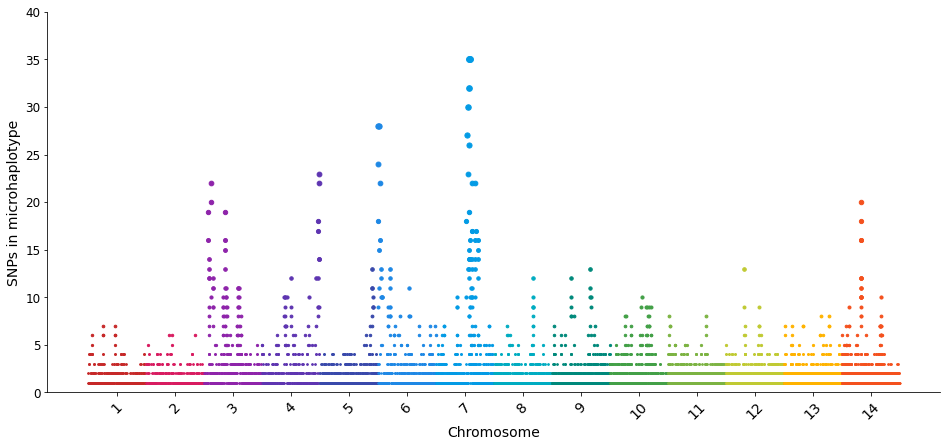

In [22]:
plot_man(results_df)

# Select Windows
Three panels to be selected: 
* 3-10 candidate SNPs, optimised for highest heterozygosity 
* 3 SNP, max het 
* any SNP, any het (I think over 0.5 het) - chosen randomly

**3-10 SNP Panel**

For every possible combination, calculate the avg het and avg distance between them with std

In [23]:
panel_3_10_snp = results_df.loc[(results_df["variant_counts"].between(3, 10)) & (results_df["het"]>0.6)]

In [24]:
panel_3_10_snp

,chrom,window_start,window_end,variant_counts,unique_allele_counts,unique_alleles_with_missing_index,unique_alleles_with_het_index,unique_allele_frequencies,unique_allele_count,entropy,het
368,PvP01_01_v1,612243,612442,3,[187 2 135 1 1 54 71 3 1 1 94 ...,[],"[1, 3, 4, 7, 8, 9, 11]","[0.26945244956772335, 0.002881844380403458, 0....",13,1.787539,0.812194
367,PvP01_01_v1,612193,612392,4,[103 1 73 8 8 4 1 84 1 62 1 ...,[],"[1, 6, 8, 10, 13, 14, 15, 17]","[0.1484149855907781, 0.001440922190201729, 0.1...",19,2.204057,0.872850
366,PvP01_01_v1,612143,612342,3,[177 16 4 1 147 1 109 3 2 234],[],"[3, 5, 7, 8]","[0.25504322766570603, 0.023054755043227664, 0....",10,1.510393,0.751136
356,PvP01_01_v1,604743,604942,4,[ 1 272 2 129 60 15 2 1 1 1 7 ...,[0],"[2, 6, 7, 8, 9, 13]","[0.001440922190201729, 0.3919308357348703, 0.0...",15,1.643569,0.750637
355,PvP01_01_v1,604693,604892,4,[ 1 1 338 75 2 1 2 8 196 1 63 ...,"[0, 1]","[4, 5, 6, 9]","[0.001440922190201729, 0.001440922190201729, 0...",13,1.335168,0.662920
...,...,...,...,...,...,...,...,...,...,...,...
171,PvP01_14_v1,250231,250430,6,[311 1 16 1 35 1 16 50 3 1 22 ...,[],"[1, 3, 5, 9, 11, 12, 13, 15, 22, 23, 24, 31]","[0.44812680115273773, 0.001440922190201729, 0....",38,2.200428,0.772085
170,PvP01_14_v1,250131,250330,4,[364 1 16 76 5 1 69 18 2 1 1 ...,[],"[1, 4, 5, 9, 10, 11, 14]","[0.5244956772334294, 0.001440922190201729, 0.0...",17,1.618852,0.685277
212,PvP01_14_v1,332331,332530,3,[188 38 3 1 380 4 80],[],"[2, 3, 5]","[0.27089337175792505, 0.05475504322766571, 0.0...",7,1.154363,0.610465
782,PvP01_14_v1,1546081,1546280,3,[ 1 242 2 4 64 3 6 3 90 239 40],[0],"[2, 5, 6, 7]","[0.001440922190201729, 0.34870317002881845, 0....",11,1.527806,0.731008


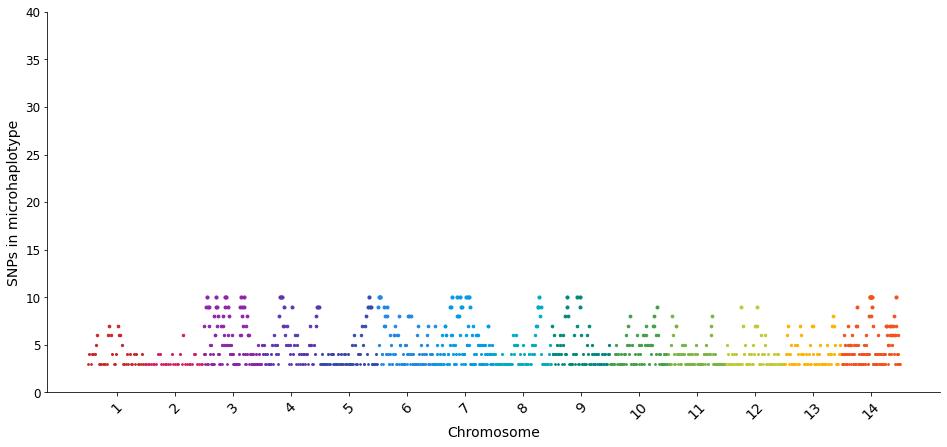

In [25]:
plot_man(panel_3_10_snp)

In [26]:
# Plot heterozygosity and position 
panel_3_10_snp = panel_3_10_snp.reset_index(drop=True)
chroms = panel_3_10_snp.chrom.unique()
chosen_panel = []
for chrom in chroms: 
    # Choose index of well spaced markers 
    chrom_3_10 = panel_3_10_snp.loc[panel_3_10_snp.chrom==chrom]
    chrom_start = chrom_3_10.window_start.min()
    chrom_end = chrom_3_10.window_start.max()
    delta = (chrom_end - chrom_start)/7
    pos = chrom_start
    while pos <= chrom_end: 
        chosen_panel.append(list(chrom_3_10.index[(chrom_3_10['window_start']-pos).abs().argsort()[:1]])[0])
        pos+=delta
print(chosen_panel)

[28, 26, 35, 11, 5, 20, 13, 39, 72, 70, 75, 59, 47, 68, 61, 66, 137, 144, 84, 96, 181, 187, 171, 176, 196, 197, 223, 199, 244, 254, 233, 275, 293, 292, 256, 269, 267, 294, 321, 391, 410, 358, 390, 400, 399, 330, 343, 445, 457, 461, 422, 443, 529, 462, 494, 585, 579, 611, 603, 549, 541, 572, 569, 650, 640, 688, 670, 628, 637, 638, 630, 749, 741, 741, 768, 707, 700, 729, 841, 844, 832, 856, 847, 789, 825, 816, 908, 890, 923, 920, 875, 864, 885, 984, 980, 1001, 1000, 936, 972, 975, 966, 1120, 1098, 1101, 1146, 1054, 1037, 1097, 1072]


In [27]:
panel_3_10_spaced = panel_3_10_snp.loc[chosen_panel]

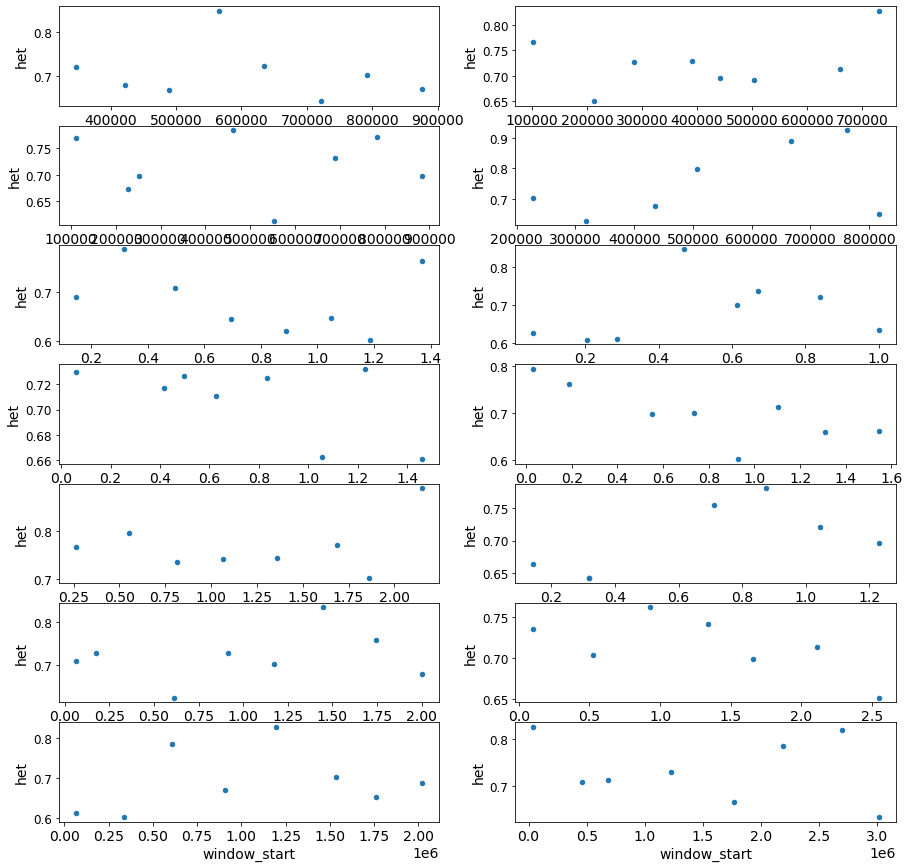

In [43]:
# Plot markers 
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15, 15))
plot_i = 0 
plot_j = 0 
for chrom in chroms : 
    panel_3_10_spaced_chrom = panel_3_10_spaced.loc[panel_3_10_spaced.chrom==chrom]
    panel_3_10_spaced_chrom.plot.scatter('window_start', 'het', ax=axes[plot_i,plot_j])
    
    plot_j += 1
    if plot_j > 1: 
        plot_j = 0
        plot_i += 1
        

In [29]:
panel_3_10_spaced

,chrom,window_start,window_end,variant_counts,unique_allele_counts,unique_alleles_with_missing_index,unique_alleles_with_het_index,unique_allele_frequencies,unique_allele_count,entropy,het
28,PvP01_01_v1,347193,347392,3,[ 2 1 2 1 320 50 1 108 2 109 77 ...,"[0, 1, 2, 3]","[6, 8]","[0.002881844380403458, 0.001440922190201729, 0...",14,1.570518,0.720291
26,PvP01_01_v1,421343,421542,3,[ 2 1 1 128 1 337 111 1 109 3],"[0, 1, 2]","[4, 7]","[0.002881844380403458, 0.001440922190201729, 0...",10,1.324569,0.679899
35,PvP01_01_v1,488693,488892,3,[ 1 343 143 1 133 1 66 6],[0],"[3, 5]","[0.001440922190201729, 0.4942363112391931, 0.2...",8,1.283520,0.667421
11,PvP01_01_v1,565943,566142,3,[ 2 1 1 1 143 104 3 63 27 1 1 ...,"[0, 1, 2, 3, 12, 16]","[6, 9, 10, 11, 14, 18]","[0.002881844380403458, 0.001440922190201729, 0...",20,2.061344,0.849218
5,PvP01_01_v1,634943,635142,4,[ 1 2 4 248 2 253 1 32 1 1 1 ...,"[0, 1, 2, 10]","[4, 6, 8, 9, 13]","[0.001440922190201729, 0.002881844380403458, 0...",17,1.606079,0.723347
...,...,...,...,...,...,...,...,...,...,...,...
1146,PvP01_14_v1,1228981,1229180,3,[ 2 141 154 1 1 266 1 1 127],"[0, 4]","[3, 6, 7]","[0.002881844380403458, 0.20317002881844382, 0....",9,1.390780,0.729069
1054,PvP01_14_v1,1762981,1763180,3,[ 1 25 2 318 4 2 1 197 144],[0],"[2, 4, 5, 6]","[0.001440922190201729, 0.03602305475504323, 0....",9,1.243385,0.665058
1037,PvP01_14_v1,2189571,2189770,4,[ 1 1 268 64 57 1 1 114 4 1 3 ...,"[0, 1, 6]","[5, 9, 11, 14]","[0.001440922190201729, 0.001440922190201729, 0...",17,1.861519,0.785934
1097,PvP01_14_v1,2699871,2700070,3,[190 1 23 3 1 30 17 1 1 130 57 ...,"[4, 7, 8]","[1, 3, 11]","[0.2737752161383285, 0.001440922190201729, 0.0...",14,1.894330,0.820209


In [30]:
final_3_10 = panel_3_10_spaced.drop(panel_3_10_spaced.nsmallest(9,'het').index)
final_3_10

,chrom,window_start,window_end,variant_counts,unique_allele_counts,unique_alleles_with_missing_index,unique_alleles_with_het_index,unique_allele_frequencies,unique_allele_count,entropy,het
28,PvP01_01_v1,347193,347392,3,[ 2 1 2 1 320 50 1 108 2 109 77 ...,"[0, 1, 2, 3]","[6, 8]","[0.002881844380403458, 0.001440922190201729, 0...",14,1.570518,0.720291
26,PvP01_01_v1,421343,421542,3,[ 2 1 1 128 1 337 111 1 109 3],"[0, 1, 2]","[4, 7]","[0.002881844380403458, 0.001440922190201729, 0...",10,1.324569,0.679899
35,PvP01_01_v1,488693,488892,3,[ 1 343 143 1 133 1 66 6],[0],"[3, 5]","[0.001440922190201729, 0.4942363112391931, 0.2...",8,1.283520,0.667421
11,PvP01_01_v1,565943,566142,3,[ 2 1 1 1 143 104 3 63 27 1 1 ...,"[0, 1, 2, 3, 12, 16]","[6, 9, 10, 11, 14, 18]","[0.002881844380403458, 0.001440922190201729, 0...",20,2.061344,0.849218
5,PvP01_01_v1,634943,635142,4,[ 1 2 4 248 2 253 1 32 1 1 1 ...,"[0, 1, 2, 10]","[4, 6, 8, 9, 13]","[0.001440922190201729, 0.002881844380403458, 0...",17,1.606079,0.723347
...,...,...,...,...,...,...,...,...,...,...,...
1146,PvP01_14_v1,1228981,1229180,3,[ 2 141 154 1 1 266 1 1 127],"[0, 4]","[3, 6, 7]","[0.002881844380403458, 0.20317002881844382, 0....",9,1.390780,0.729069
1054,PvP01_14_v1,1762981,1763180,3,[ 1 25 2 318 4 2 1 197 144],[0],"[2, 4, 5, 6]","[0.001440922190201729, 0.03602305475504323, 0....",9,1.243385,0.665058
1037,PvP01_14_v1,2189571,2189770,4,[ 1 1 268 64 57 1 1 114 4 1 3 ...,"[0, 1, 6]","[5, 9, 11, 14]","[0.001440922190201729, 0.001440922190201729, 0...",17,1.861519,0.785934
1097,PvP01_14_v1,2699871,2700070,3,[190 1 23 3 1 30 17 1 1 130 57 ...,"[4, 7, 8]","[1, 3, 11]","[0.2737752161383285, 0.001440922190201729, 0.0...",14,1.894330,0.820209


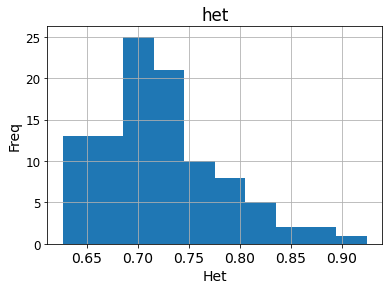

In [31]:
final_3_10.hist(column='het')
plt.xlabel('Het')
plt.ylabel('Freq')
plt.show()

In [32]:
print('Mean het: ',final_3_10.het.mean())
print('Min het: ',final_3_10.het.min())
print('Max het: ',final_3_10.het.max())

Mean het:  0.7240810902839487
Min het:  0.6259374299263344
Max het:  0.9248851830012706


# Sasha selection file
Given to Georgia from assay in lab

In [33]:
panel_choices = pd.read_csv("../supplementary_files/expanded_stats_sheet_pv_mhaps__copy_202208225.csv")
panel_choices

,Unnamed: 0,target_name,chr,start,end,Pv_average_amount,Human_average_amount,Mixed_average_amount,Pf_average_amount,Pm_average_amount,...,Hom Disc Prop of Callable,Uncallable Percentage,soft_filter,panel,chromosome,pos,avg_het,num_targets_in_region,het_diff,new_algo_decision
0,0.0,7761.0,PvP01_01_v2,388121,388197,1180.051136,4.333333,836.00,2.000000,0.333333,...,0.000000,3.240741,True,ANY,1.0,1.0,0.783169,2.0,-0.050319,NO
1,1.0,7907.0,PvP01_01_v2,395355,395521,101.0795455,0.000000,181.00,1.000000,0.000000,...,0.000000,3.125000,True,3_10,1.0,1.0,0.833488,2.0,-0.050319,YES
2,2.0,9495.0,PvP01_01_v2,474800,474876,1073.926136,1.666667,720.00,1.000000,0.333333,...,0.538600,3.125000,True,ANY,1.0,2.0,0.709303,2.0,-0.086070,NO
3,3.0,9674.0,PvP01_01_v2,483735,483883,133.9488636,0.333333,92.00,0.000000,0.333333,...,0.547445,4.687500,True,3_10,1.0,2.0,0.795373,2.0,-0.086070,YES
4,4.0,10969.0,PvP01_01_v2,548491,548590,389.5511364,0.000000,302.00,1.333333,0.000000,...,0.000000,4.398148,True,ANY,1.0,3.0,0.643728,2.0,-0.223528,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,NaN,NaN,PvP01_14_v2,1270400,1270401,DHPS_A553G,1840.560000,0.00,875.000000,1.670000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YES
148,NaN,NaN,PvP01_10_v2,479907,479908,MDR1_F1076L,1429.010000,1.33,1127.000000,6.670000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YES
149,NaN,NaN,PvP01_10_v2,480206,480207,MDR1_Y976F,2137.650000,1.00,1021.000000,7.330000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YES
150,NaN,NaN,PvP01_MIT_v2,1370,1563,MIT_Species1,27411.020000,161.33,30433.000000,125917.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YES


In [34]:
lab_3_10_panel = panel_choices.loc[panel_choices.panel=='3_10']
lab_3_10_panel[['chr','start','end']]

,chr,start,end
1,PvP01_01_v2,395355,395521
3,PvP01_01_v2,483735,483883
5,PvP01_01_v2,612225,612348
6,PvP01_01_v2,772093,772211
9,PvP01_02_v2,213958,214133
...,...,...,...
139,PvP01_14_v2,2189680,2189767
140,PvP01_14_v2,2261604,2261794
142,PvP01_14_v2,2699925,2700045
143,PvP01_14_v2,2810468,2810642


In [35]:
lab_3_10_panel.chr.unique()

array(['PvP01_01_v2', 'PvP01_02_v2', 'PvP01_03_v2', 'PvP01_04_v2',
       'PvP01_05_v2', 'PvP01_06_v2', 'PvP01_07_v2', 'PvP01_08_v2',
       'PvP01_09_v2', 'PvP01_10_v2', 'PvP01_11_v2', 'PvP01_12_v2',
       'PvP01_13_v2', 'PvP01_14_v2'], dtype=object)

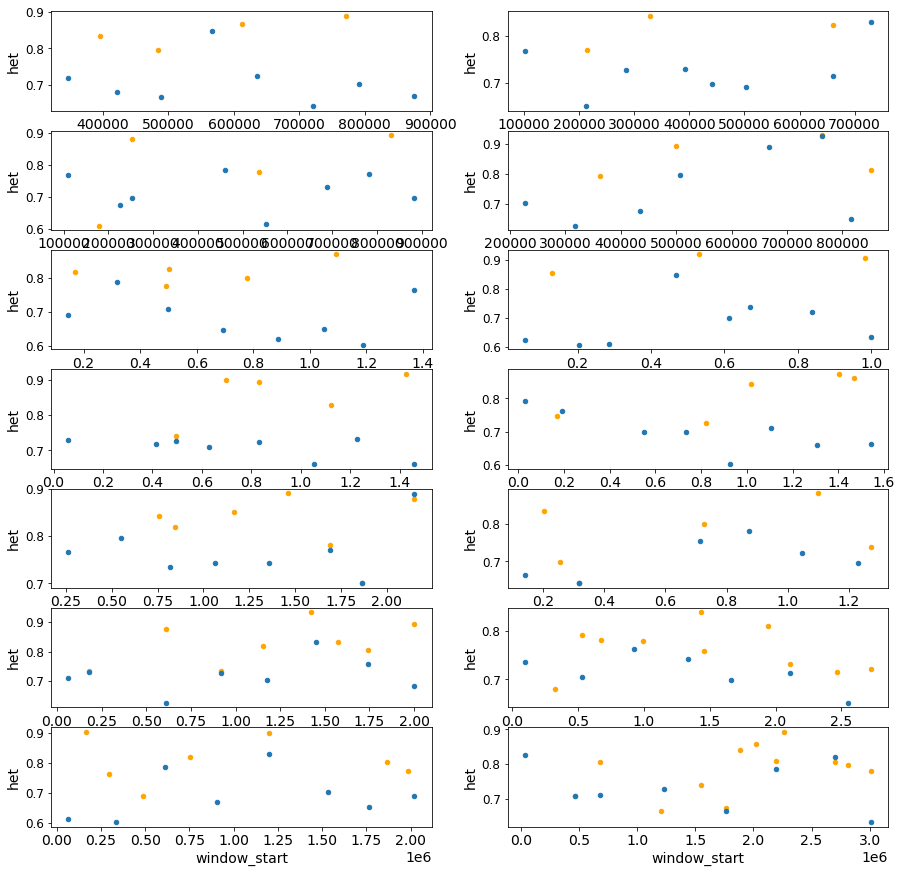

In [36]:
# Plot markers comparing sasha's to mine 
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15, 15))
plot_i = 0 
plot_j = 0 
for chrom in chroms : 
    lab_3_10_chrom = lab_3_10_panel.loc[lab_3_10_panel.chr==chrom.replace('v1','v2')]
    lab_3_10_chrom.plot.scatter('start', 'avg_het', ax=axes[plot_i,plot_j], c='orange')
    
    panel_3_10_spaced_chrom = panel_3_10_spaced.loc[panel_3_10_spaced.chrom==chrom]
    panel_3_10_spaced_chrom.plot.scatter('window_start', 'het', ax=axes[plot_i,plot_j])
    plot_j += 1
    if plot_j > 1: 
        plot_j = 0
        plot_i += 1
        

In [37]:
print('Mean het: ',lab_3_10_panel.avg_het.mean())
print('Min het: ',lab_3_10_panel.avg_het.min())
print('Max het: ',lab_3_10_panel.avg_het.max())

Mean het:  0.8108142494756098
Min het:  0.610065437
Max het:  0.932957895


# Genotypes

Get genotypes for variants in panel for paired samples 

In [38]:
pv4 = Pv4("gs://pv4_staging/")
variant_dataset= pv4.variant_calls(extended=True)
pv4_metadata = pv4.sample_metadata()

Filter variants as in NB1

In [39]:
# Samples are FWS > 0.95, callable > 50%, in the analysis set 
pv4_fws = pd.read_csv('../supplementary_files/Pv4_fws.txt', sep='\t', comment='t')
pv4_metadata = pd.merge(pv4_metadata, pv4_fws, on='Sample', how='outer')
loc_filtered_samples = (
    (pv4_metadata["Fws"] > 0.95)
    & (pv4_metadata["% callable"] > 50)
    & (pv4_metadata["Exclusion reason"] == "Analysis_set")
)
subset_metadata = pv4_metadata[loc_filtered_samples]
variant_dataset_filtered = variant_dataset.isel(samples=loc_filtered_samples)

# Variants pass filters, are SNPs, and are in CDS
filters = (
    (variant_dataset_filtered["variant_filter_pass"].data)
    & (variant_dataset_filtered["variant_is_snp"].data)
    & (variant_dataset_filtered["variant_CDS"].data)
)
variant_dataset_filtered = variant_dataset_filtered.isel(variants=filters)

# Biallelic SNPs 
biallelic_filter = (variant_dataset_filtered["variant_numalt"] == 1).data
variant_dataset_filtered = variant_dataset_filtered.isel(variants=biallelic_filter)

# Filter the variants to only include minor allele frequency over 0.1 and missingness less than 0.1
gt = allel.GenotypeDaskArray(variant_dataset_filtered["call_genotype"].data)
ac_pop = gt.count_alleles()
ac_pop_freq = ac_pop.to_frequencies().compute()
freq_missing = gt.count_missing(axis=1).compute() / gt.shape[1]
pop_freq_filter = (ac_pop_freq[:, :2].min(axis=1) > 0.1) & (freq_missing < 0.1)
variant_dataset_filtered = variant_dataset_filtered.isel(variants=pop_freq_filter)

variant_dataset_filtered

<xarray.Dataset>
Dimensions:                                   (variants: 13464, alleles: 7, samples: 694, ploidy: 2, genotypes: 3, alt_alleles: 6)
Coordinates:
    variant_position                          (variants) int32 dask.array<chunksize=(258,), meta=np.ndarray>
    variant_chrom                             (variants) object dask.array<chunksize=(258,), meta=np.ndarray>
    sample_id                                 (samples) object dask.array<chunksize=(694,), meta=np.ndarray>
Dimensions without coordinates: variants, alleles, samples, ploidy, genotypes, alt_alleles
Data variables: (12/42)
    variant_allele                            (variants, alleles) object dask.array<chunksize=(258, 1), meta=np.ndarray>
    variant_filter_pass                       (variants) bool dask.array<chunksize=(258,), meta=np.ndarray>
    variant_is_snp                            (variants) bool dask.array<chunksize=(258,), meta=np.ndarray>
    variant_numalt                            (variants) int32 dask.array<chunksize=(258,), meta=np.ndarray>
    variant_CDS                               (variants) bool dask.array<chunksize=(258,), meta=np.ndarray>
    call_genotype                             (variants, samples, ploidy) int8 dask.array<chunksize=(258, 37, 2), meta=np.ndarray>
    ...                                        ...
    variant_SNPEFF_IMPACT                     (variants) object dask.array<chunksize=(258,), meta=np.ndarray>
    variant_SNPEFF_TRANSCRIPT_ID              (variants) object dask.array<chunksize=(258,), meta=np.ndarray>
    variant_SOR                               (variants) float32 dask.array<chunksize=(258,), meta=np.ndarray>
    variant_VQSLOD                            (variants) float32 dask.array<chunksize=(258,), meta=np.ndarray>
    variant_VariantType                       (variants) object dask.array<chunksize=(258,), meta=np.ndarray>
    variant_altlen                            (variants, alt_alleles) int32 dask.array<chunksize=(258, 6), meta=np.ndarray>

Find variants in windows for markers chosen

In [40]:
total_window_selection = np.full_like(variant_dataset_filtered.variants,False)

for i, window in lab_3_10_panel.iterrows(): 
    window_selection_vals = ((variant_dataset_filtered['variant_chrom'] == window['chr']) &
                     (variant_dataset_filtered['variant_position'] >= window['start']) &
                     (variant_dataset_filtered['variant_position'] <= window['end']))
    total_window_selection = (window_selection_vals | total_window_selection)

In [41]:
marker_variants = variant_dataset_filtered.isel(variants=total_window_selection)
marker_variants

<xarray.Dataset>
Dimensions:                                   (variants: 13464, alleles: 7, samples: 694, ploidy: 2, genotypes: 3, alt_alleles: 6)
Coordinates:
    variant_position                          (variants) int32 dask.array<chunksize=(13464,), meta=np.ndarray>
    variant_chrom                             (variants) object dask.array<chunksize=(13464,), meta=np.ndarray>
    sample_id                                 (samples) object dask.array<chunksize=(694,), meta=np.ndarray>
Dimensions without coordinates: variants, alleles, samples, ploidy, genotypes, alt_alleles
Data variables: (12/42)
    variant_allele                            (variants, alleles) object dask.array<chunksize=(13464, 1), meta=np.ndarray>
    variant_filter_pass                       (variants) bool dask.array<chunksize=(13464,), meta=np.ndarray>
    variant_is_snp                            (variants) bool dask.array<chunksize=(13464,), meta=np.ndarray>
    variant_numalt                            (variants) int32 dask.array<chunksize=(13464,), meta=np.ndarray>
    variant_CDS                               (variants) bool dask.array<chunksize=(13464,), meta=np.ndarray>
    call_genotype                             (variants, samples, ploidy) int8 dask.array<chunksize=(13464, 37, 2), meta=np.ndarray>
    ...                                        ...
    variant_SNPEFF_IMPACT                     (variants) object dask.array<chunksize=(13464,), meta=np.ndarray>
    variant_SNPEFF_TRANSCRIPT_ID              (variants) object dask.array<chunksize=(13464,), meta=np.ndarray>
    variant_SOR                               (variants) float32 dask.array<chunksize=(13464,), meta=np.ndarray>
    variant_VQSLOD                            (variants) float32 dask.array<chunksize=(13464,), meta=np.ndarray>
    variant_VariantType                       (variants) object dask.array<chunksize=(13464,), meta=np.ndarray>
    variant_altlen                            (variants, alt_alleles) int32 dask.array<chunksize=(13464, 6), meta=np.ndarray>

Filter to be sample pairs 

In [42]:
pair_samples_df = pd.read_csv('sample_pairs.csv', index_col=0).reset_index(drop=True)
pair_samples_df

,Sample,Study,Site,First-level administrative division,Country,Lat,Long,Year,ENA,All samples same individual,Population,% callable,QC pass,Exclusion reason,Is returning traveller
0,Colombia_30102100438-A,X0001-PV-MULTI-HUPALO2016,Tierralta,Colombia: Cordoba,Colombia,8.172778,-76.059444,2013,"SRR1564963,SRR1568155","Colombia_30102100438-A,Colombia_30102100438-B",LAM,78.03,False,Lower_covered_duplicate,False
1,Colombia_30102100438-B,X0001-PV-MULTI-HUPALO2016,Tierralta,Colombia: Cordoba,Colombia,8.172778,-76.059444,2013,"SRR1564939,SRR1568227","Colombia_30102100438-A,Colombia_30102100438-B",LAM,78.18,True,Analysis_set,False
2,Colombia_30102100441-A,X0001-PV-MULTI-HUPALO2016,Tierralta,Colombia: Cordoba,Colombia,8.172778,-76.059444,2013,"SRR1565136,SRR1568159","Colombia_30102100441-A,Colombia_30102100441-B",LAM,78.68,False,Lower_covered_duplicate,False
3,Colombia_30102100441-B,X0001-PV-MULTI-HUPALO2016,Tierralta,Colombia: Cordoba,Colombia,8.172778,-76.059444,2013,"SRR1564989,SRR1567977","Colombia_30102100441-A,Colombia_30102100441-B",LAM,79.51,True,Analysis_set,False
4,Colombia_30102100443-A,X0001-PV-MULTI-HUPALO2016,Tierralta,Colombia: Cordoba,Colombia,8.172778,-76.059444,2013,"SRR1562971,SRR1564927","Colombia_30102100443-A,Colombia_30102100443-B",LAM,78.26,False,Lower_covered_duplicate,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,VVX12129,1157-PV-MULTI-PRICE,Dak O,Vietnam: Binh Phuoc,Vietnam,12.047594,107.093178,2015,ERR2309680,"VVX01078,VVX12129",ESEA,73.62,False,Lower_covered_duplicate,False
210,VVX12145,1157-PV-MULTI-PRICE,Krong Pa,Vietnam: Gia Lai,Vietnam,13.221819,108.682475,2015,ERR2309684,"VVX01026,VVX12145",ESEA,87.19,False,Lower_covered_duplicate,False
211,VVX12150,1157-PV-MULTI-PRICE,Krong Pa,Vietnam: Gia Lai,Vietnam,13.221819,108.682475,2016,ERR2309685,"VVX12078,VVX12150,VVX12151",ESEA,86.52,False,Lower_covered_duplicate,False
212,VVX12151,1157-PV-MULTI-PRICE,Krong Pa,Vietnam: Gia Lai,Vietnam,13.221819,108.682475,2016,ERR2309686,"VVX12078,VVX12150,VVX12151",ESEA,89.89,True,Analysis_set,False


In [66]:
marker_variants.isel(samples=0)

<xarray.Dataset>
Dimensions:                                   (variants: 13464, alleles: 7, ploidy: 2, genotypes: 3, alt_alleles: 6)
Coordinates:
    variant_position                          (variants) int32 dask.array<chunksize=(13464,), meta=np.ndarray>
    variant_chrom                             (variants) object dask.array<chunksize=(13464,), meta=np.ndarray>
    sample_id                                 object dask.array<chunksize=(), meta=np.ndarray>
Dimensions without coordinates: variants, alleles, ploidy, genotypes, alt_alleles
Data variables: (12/42)
    variant_allele                            (variants, alleles) object dask.array<chunksize=(13464, 1), meta=np.ndarray>
    variant_filter_pass                       (variants) bool dask.array<chunksize=(13464,), meta=np.ndarray>
    variant_is_snp                            (variants) bool dask.array<chunksize=(13464,), meta=np.ndarray>
    variant_numalt                            (variants) int32 dask.array<chunksize=(13464,), meta=np.ndarray>
    variant_CDS                               (variants) bool dask.array<chunksize=(13464,), meta=np.ndarray>
    call_genotype                             (variants, ploidy) int8 dask.array<chunksize=(13464, 2), meta=np.ndarray>
    ...                                        ...
    variant_SNPEFF_IMPACT                     (variants) object dask.array<chunksize=(13464,), meta=np.ndarray>
    variant_SNPEFF_TRANSCRIPT_ID              (variants) object dask.array<chunksize=(13464,), meta=np.ndarray>
    variant_SOR                               (variants) float32 dask.array<chunksize=(13464,), meta=np.ndarray>
    variant_VQSLOD                            (variants) float32 dask.array<chunksize=(13464,), meta=np.ndarray>
    variant_VariantType                       (variants) object dask.array<chunksize=(13464,), meta=np.ndarray>
    variant_altlen                            (variants, alt_alleles) int32 dask.array<chunksize=(13464, 6), meta=np.ndarray>

In [78]:
filter_samples = np.isin(marker_variants.sample_id, pair_samples_df.Sample)
marker_variants_paired_samples = marker_variants.isel(samples=filter_samples)

In [79]:
g_per_sample = marker_variants_paired_samples.call_genotype.data.compute()
samples = marker_variants_paired_samples.sample_id.data.compute()
chrom = marker_variants_paired_samples.variant_chrom.data.compute() 
pos = marker_variants_paired_samples.variant_position.data.compute() 

In [101]:
len(g_per_sample[0])

67

In [102]:
d = {}
for i in range(len(samples)): 
    d[samples[i]] = list(g_per_sample[:,i])

In [109]:
genotypes_df = pd.DataFrame(data={'Chrom':chrom,'Pos':pos,})
genotypes_df = genotypes_df.join(pd.DataFrame(data=d))
genotypes_df

,Chrom,Pos,Colombia_30102100438-B,Colombia_30102100441-B,Colombia_30102100443-B,PD0607-C,PD0620-C,PH0073-CW,PH0190-C,PH0312-C,...,VVX01751,VVX01915,VVX01924,VVX01945,VVX11916,VVX11917,VVX12027,VVX12042,VVX12151,india_C0924_Day_0
0,PvP01_01_v1,121493,"[0, 0]","[0, 0]","[0, 0]","[1, 1]","[1, 1]","[0, 0]","[1, 1]","[1, 1]",...,"[1, 1]","[0, 0]","[0, 0]","[1, 1]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[1, 1]","[0, 0]"
1,PvP01_01_v1,121493,"[0, 0]","[0, 0]","[0, 0]","[1, 1]","[1, 1]","[0, 0]","[1, 1]","[1, 1]",...,"[1, 1]","[0, 0]","[0, 0]","[1, 1]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[1, 1]","[0, 0]"
2,PvP01_01_v1,121493,"[0, 0]","[0, 0]","[0, 0]","[1, 1]","[1, 1]","[0, 0]","[1, 1]","[1, 1]",...,"[1, 1]","[0, 0]","[0, 0]","[1, 1]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[1, 1]","[0, 0]"
3,PvP01_01_v1,121493,"[0, 0]","[0, 0]","[0, 0]","[1, 1]","[1, 1]","[0, 0]","[1, 1]","[1, 1]",...,"[1, 1]","[0, 0]","[0, 0]","[1, 1]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[1, 1]","[0, 0]"
4,PvP01_01_v1,121493,"[0, 0]","[0, 0]","[0, 0]","[1, 1]","[1, 1]","[0, 0]","[1, 1]","[1, 1]",...,"[1, 1]","[0, 0]","[0, 0]","[1, 1]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[1, 1]","[0, 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13459,PvP01_01_v1,121493,"[0, 0]","[0, 0]","[0, 0]","[1, 1]","[1, 1]","[0, 0]","[1, 1]","[1, 1]",...,"[1, 1]","[0, 0]","[0, 0]","[1, 1]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[1, 1]","[0, 0]"
13460,PvP01_01_v1,121493,"[0, 0]","[0, 0]","[0, 0]","[1, 1]","[1, 1]","[0, 0]","[1, 1]","[1, 1]",...,"[1, 1]","[0, 0]","[0, 0]","[1, 1]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[1, 1]","[0, 0]"
13461,PvP01_01_v1,121493,"[0, 0]","[0, 0]","[0, 0]","[1, 1]","[1, 1]","[0, 0]","[1, 1]","[1, 1]",...,"[1, 1]","[0, 0]","[0, 0]","[1, 1]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[1, 1]","[0, 0]"
13462,PvP01_01_v1,121493,"[0, 0]","[0, 0]","[0, 0]","[1, 1]","[1, 1]","[0, 0]","[1, 1]","[1, 1]",...,"[1, 1]","[0, 0]","[0, 0]","[1, 1]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[1, 1]","[0, 0]"


In [110]:
genotypes_df.to_csv('mhap_selection_GT_results/3_10_snp_genotypes_paired_samples.csv')